In [3]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [4]:
# summary of data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print('target names = ', digits.target_names)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
target names =  [0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided 

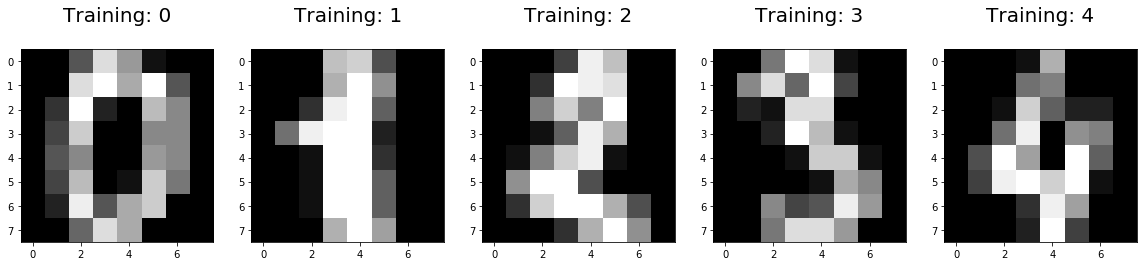

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show examples of dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [6]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
X_train = np.append(X_train,np.ones((X_train.shape[0],1)), axis=1) # add bias
X_test = np.append(X_test,np.ones((X_test.shape[0],1)), axis=1) # add bias
print(X_train[256], y_train[256])
print(X_train.shape)
print(X_test.shape)

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.  1.] 1
(1347, 65)
(450, 65)


In [7]:
# 3.2 batch gradient descent (GD) for Logistic regression (softmax)
def LogisticRegression_GD(X_train, y_train, learning_rate):
    eta = 0.1
    epsilon = 1.0e-4
    loss = list()
    n, m = X_train.shape # n = number of training data, m = feature size + bias, 65
    num_class = len(digits.target_names) # 0-9 -> 10 classes
    W = np.random.randn(m,num_class) # (feature size+bias, num_class), (65, 10)
    #print(W.shape)
    grad = np.zeros(W.shape)
    likelihood = np.zeros((n,num_class))

    # loop through epochs
    while(True):
        class_score = np.dot(X_train,W) #(n,num_class)
        max_class_score = np.max(class_score,axis=1) #(n,), used to perform z0 = z−maxj z
        # [:,None] - expands 1D to 2D array, which gets broadcasted to class_score.shape when subtracting 
        class_score = class_score - max_class_score[:,None] #(n,num_class)
        exp_class_score = np.exp(class_score)  #(n,num_class)

        correct_exp_class_score = exp_class_score[range(n),y_train] #(n,)
        sum_exp_class_score = np.sum(exp_class_score,axis=1) #(n,)

        #compute loss
        cost = -np.sum(np.log(correct_exp_class_score / sum_exp_class_score))
        cost /= n
        cost += 0.5 * eta * np.sum(np.multiply(W,W)) #regularizer
        loss.append(cost)
        
        #check if end training condition is met
        if (len(loss) > 1):
            diff = loss[-2] - loss[-1]
        else: 
            diff = loss[-1]
        if (abs(diff) <= epsilon):
            b = W[-1,:]
            break
        
        #compute gradient descent
        likelihood = exp_class_score/sum_exp_class_score[:,None] #(n,num_class)
        likelihood[range(n),y_train] -= 1
        grad = np.dot(np.transpose(X_train),likelihood) #(m,num_class)
        grad /= n
        grad +=  eta * W
        W -= learning_rate * grad
    return W, b, loss

---------------------------------------
learning rate = 0.05
training precision = 0.9896065330363771
test precision = 0.9666666666666667
---------------------------------------
learning rate = 0.005
training precision = 0.9910913140311804
test precision = 0.9666666666666667
---------------------------------------
learning rate = 0.01
training precision = 0.9896065330363771
test precision = 0.9711111111111111


Text(0, 0.5, 'loss')

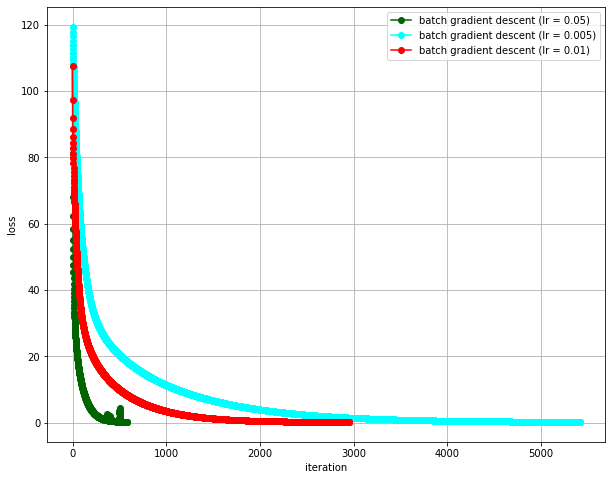

In [8]:
# evaluation of different learning rate
learning_rate = [5.0e-2, 5.0e-3, 1.0e-2]
cl = ['darkgreen', 'cyan', 'red']
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(learning_rate)):
    
    print('---------------------------------------')
    print('learning rate =', learning_rate[i])
    W, b, loss_GD = LogisticRegression_GD(X_train, y_train, learning_rate[i])
    class_score = np.dot(X_train,W)
    pred_classes = np.argmax(class_score,axis=1) #(n,), predicted classes
    TP = sum(np.equal(y_train,pred_classes))
    prec_train = TP/len(pred_classes)

    print('training precision =', prec_train)

    class_score = np.dot(X_test,W)
    pred_classes = np.argmax(class_score,axis=1) #(n,), predicted classes
    TP = sum(np.equal(y_test,pred_classes))
    prec_test = TP/len(pred_classes)
 
    print('test precision =', prec_test)
    
    plt.plot(loss_GD, c = cl[i], ls = '-', marker = 'o', label = 'batch gradient descent (lr = ' + str(learning_rate[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

In [9]:
loss_GD[-1:-10:-1]

[0.21087415104718574,
 0.21097394530784302,
 0.21107396203913786,
 0.21117420174695517,
 0.21127466493834074,
 0.21137535212150338,
 0.211476263805818,
 0.21157740050182772,
 0.211678762721247]

In [10]:
def BatchSel(X, y, batch_size):
    n = X.shape[0]
    indices = np.arange(n)
    np.random.shuffle(indices)

    for ind in range(0,n,batch_size):
        batchInd = indices[ind:min(ind+batch_size,n)]
        yield X[batchInd,:],y[batchInd]

def ComputeGrad(X_train,y_train,learning_rate,eta,epoch,W):

    n, m = X_train.shape   
    num_class = len(digits.target_names) # 0-9 -> 10 classes
    grad = np.zeros((m,num_class))
    likelihood = np.zeros((n,num_class))  
    
    class_score = np.dot(X_train,W) #(n,num_class)
    max_class_score = np.max(class_score,axis=1) #(n,), used to perform z0 = z−maxj z
    # [:,None] - expands 1D to 2D array, which gets broadcasted to class_score.shape when subtracting 
    class_score = class_score - max_class_score[:,None] #(n,num_class)

    exp_class_score = np.exp(class_score)  #(n,num_class)
    correct_exp_class_score = exp_class_score[range(n),y_train] #(n,)
    sum_exp_class_score = np.sum(exp_class_score,axis=1) #(n,)
    
    #compute loss
    cost = -np.sum(np.log(correct_exp_class_score / sum_exp_class_score))
    cost /= n
    cost += 0.5 * eta * np.sum(np.multiply(W,W)) #regularizer

    #compute gradient descent
    likelihood = exp_class_score/sum_exp_class_score[:,None] #(n,num_class)
    likelihood[range(n),y_train] -= 1
    grad = np.dot(np.transpose(X_train),likelihood) #(m,num_class)
    grad /= n
    grad +=  eta * W
    W -= learning_rate * grad
    b = W[-1,:]
    
    return W, b, cost

In [11]:
# 3.3 stochastic gradient descent (SGD) for Logistic regression

def LogisticRegression_SGD(X, y, batch_size, lr=1.0e-2, eta=2.0e-1, eps = 1.0e-4, max_epoch=500):
    # initialization
    notstop = True
    epoch = 0
    loss = []
    costPerEpoch = 0
    n, m = X.shape # n = number of training data, m = feature size + bias, 65
    num_class = len(digits.target_names) # 0-9 -> 10 classes
    W = np.random.randn(m,num_class) # (feature size+bias, num_class), (65, 10)
    b = np.ones((num_class,1))
    batchNum = int(n/batch_size)

    # optimization loop	
    while notstop and epoch < max_epoch:
        
        # SGD of each epoch
        for Xbatch, ybatch in BatchSel(X,y,batch_size):
            if Xbatch.shape[0] < batch_size: # ignore incompleted batch
                continue
            #print(f'Xbatch.shape:{Xbatch.shape},Ybatch.shape:{ybatch.shape}') 
            W,b,cost =  ComputeGrad(Xbatch,ybatch,lr,eta,epoch,W)
            costPerEpoch += cost
            
        costPerEpoch /= batchNum    
        loss.append(costPerEpoch)
        
#         if epoch%10 == 0: print(f'epoch:{epoch}, F(W):{costPerEpoch}')
        costPerEpoch = 0
        
        # half lr if not improving in 10 epochs
        if epoch > 10:
            if loss[epoch - 10] <= loss[epoch] - eps:
                lr *= 0.5
                print('reduce learning rate to', lr)
        
        # stop if not improving in 20 epochs
        if epoch > 20:
            if loss[epoch - 20] <= loss[epoch] - eps or abs(loss[epoch] - loss[epoch-1]) <= eps:                
                notstop = False
                break
 
        epoch += 1        
        #TODO: W and b
    return (W, b, loss)

---------------------------------------
batch_size = 10
reduce learning rate to 0.005
training precision = 0.9569413511507052
test precision = 0.9488888888888889
---------------------------------------
batch_size = 50
reduce learning rate to 0.025
reduce learning rate to 0.0125
training precision = 0.9725315515961396
test precision = 0.9488888888888889
---------------------------------------
batch_size = 100
reduce learning rate to 0.05
reduce learning rate to 0.025
reduce learning rate to 0.0125
reduce learning rate to 0.00625
reduce learning rate to 0.003125
training precision = 0.9844097995545658
test precision = 0.9644444444444444


Text(0, 0.5, 'loss')

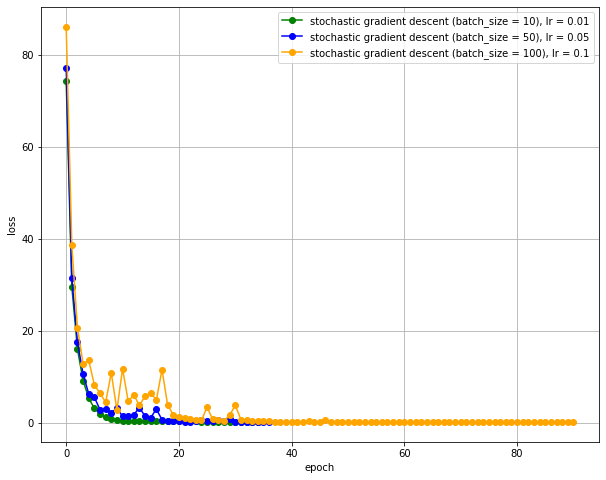

In [17]:
# evaluation of different batch size
bs = [10, 50, 100]

cl = ['green', 'blue', 'orange']
#  different learning rate for different batch size
lr = [1.0e-2*(b/10) for b in bs]
#lr = [1.0e-2 for b in bs]

#lr = [1.0e-2,1.0e-2,1.0e-2]
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):
    
    print('---------------------------------------')
    print('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    class_score = np.dot(X_train,W)
    pred_classes = np.argmax(class_score,axis=1) #(n,), predicted classes
    TP = sum(np.equal(y_train,pred_classes))
    prec_train = TP/len(pred_classes)

    print('training precision =', prec_train)

    class_score = np.dot(X_test,W)
    pred_classes = np.argmax(class_score,axis=1) #(n,), predicted classes
    TP = sum(np.equal(y_test,pred_classes))
    prec_test = TP/len(pred_classes)
    print('test precision =', prec_test)
    
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + '), lr = ' +str(lr[i]))

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 3.90625e-07
reduce learning rate to 1.953125e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 3.90625e-07
reduce learning rate to 1.953125e-07
reduce learning rate to 9.765625e-08
reduce learning rate to 4.8828125e-08
reduce learning rate to

reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 3.90625e-07
reduce learning rate to 1.953125e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce 

reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 3.90625e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 3.90625e-07
reduc

reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06

reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 3.90625e-07
reduce learning rate to 1.953125e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate

reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learn

reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 3.90625e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 3.90625e-07
reduce learning rate to 1.953125e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce 

reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 3.90625e-07
reduce learning rate to 1.953125e-07
reduce learning rate to 9.765625e-08
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning

reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 3.90625e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate t

reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 3.90625e-07
reduce learning rate to 1.953125e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate

reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 1.5625e-06
reduce learning rate to 7.8125e-07
reduce learning rate to 5e-05
reduce learning rate to 2.5e-05
reduce learning rate to 1.25e-05
reduce learning rate to 6.25e-06
reduce learning rate to 3.125e-06
reduce learning rate to 5e-0

Text(0, 0.5, 'training time')

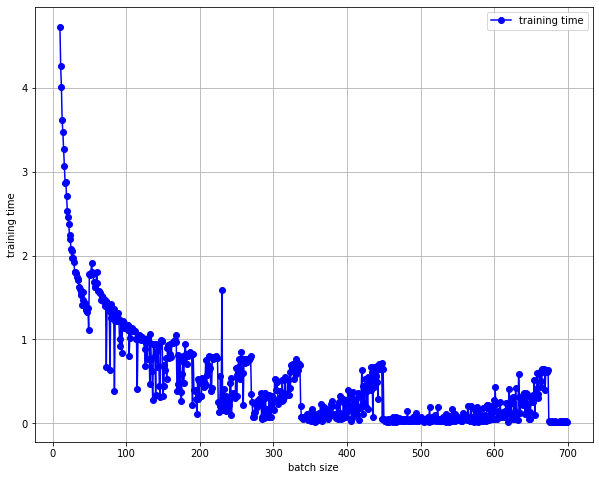

In [26]:
# evaluation of different batch size
import time
training_time = []
# bs = [10, 50, 100]
bs = range(10,700,1)
# cl = ['green', 'blue', 'orange']
# different learning rate for different batch size
#lr = [1.0e-2*(b/10) for b in bs]
lr = [1.0e-3 for b in bs]

#lr = [1.0e-2,1.0e-2,1.0e-2]
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):
    
    start_time = time.time()
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    end_time = (time.time() - start_time)
    training_time.append(end_time)


    class_score = np.dot(X_train,W)
    pred_classes = np.argmax(class_score,axis=1) #(n,), predicted classes
    TP = sum(np.equal(y_train,pred_classes))
    prec_train = TP/len(pred_classes)

    class_score = np.dot(X_test,W)
    pred_classes = np.argmax(class_score,axis=1) #(n,), predicted classes
    TP = sum(np.equal(y_test,pred_classes))
    prec_test = TP/len(pred_classes)

    
plt.plot(bs,training_time, c = cl[1], ls = '-', marker = 'o', label='training time')

plt.grid()
plt.legend()
plt.xlabel('batch size')
plt.ylabel('training time')